In [13]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Настройка отображения
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Библиотеки успешно импортированы!")

Библиотеки успешно импортированы!


In [19]:
from google.colab import files
uploaded = files.upload()

# После загрузки файла
import io
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

Saving vkr_dataset_open_credit_card.csv to vkr_dataset_open_credit_card.csv


In [20]:
# Шаг 1: Загрузка данных
print("="*60)
print("ШАГ 1: ЗАГРУЗКА И ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ")
print("="*60)

# Загружаем данные (укажите правильное имя файла)
try:

    file_name = 'data.csv'
    df = pd.read_csv(file_name, sep=',', encoding='utf-8')
    print(f"✓ Файл '{file_name}' успешно загружен!")
except FileNotFoundError:
    # Ищем CSV файлы в директории
    import os
    csv_files = [f for f in os.listdir() if f.endswith('.csv')]
    if csv_files:
        print(f"Найдены CSV файлы: {csv_files}")
        # Берем первый CSV файл
        df = pd.read_csv(csv_files[0], sep=',', encoding='utf-8')
        print(f"✓ Загружен файл: '{csv_files[0]}'")
    else:
        print("CSV файлы не найдены в текущей директории")
        print("Содержимое директории:", os.listdir())

print("\n" + "="*60)
print("1. ОСНОВНЫЕ ХАРАКТЕРИСТИКИ ДАННЫХ")
print("="*60)
print(f"• Размер данных: {df.shape[0]} строк, {df.shape[1]} столбцов")
print(f"• Имена столбцов: {list(df.columns)}")

print("\n" + "="*60)
print("2. ПРЕВЬЮ ДАННЫХ (первые 3 строки)")
print("="*60)
display(df.head(3))

print("\n" + "="*60)
print("3. ТИПЫ ДАННЫХ И ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ")
print("="*60)
print(df.info())

print("\n" + "="*60)
print("4. ОСНОВНЫЕ СТАТИСТИКИ ПО ЧИСЛОВЫМ ПРИЗНАКАМ")
print("="*60)
display(df.describe())

print("\n" + "="*60)
print("5. ОСНОВНЫЕ СТАТИСТИКИ ПО ВСЕМ ПРИЗНАКАМ")
print("="*60)
display(df.describe(include='all'))

ШАГ 1: ЗАГРУЗКА И ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ
Найдены CSV файлы: ['vkr_dataset_open_credit_card.csv']
✓ Загружен файл: 'vkr_dataset_open_credit_card.csv'

1. ОСНОВНЫЕ ХАРАКТЕРИСТИКИ ДАННЫХ
• Размер данных: 170746 строк, 18 столбцов
• Имена столбцов: ['client_id', 'gender', 'age', 'marital_status', 'job_position', 'credit_sum', 'credit_month', 'score_shk', 'education', 'tariff_id', 'living_region', 'okrug', 'avregzarplata', 'monthly_income', 'credit_count', 'overdue_credit_count', 'open_account_flg', 'date_bank']

2. ПРЕВЬЮ ДАННЫХ (первые 3 строки)


,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg,date_bank
0,1,2,48.00,3.00,15,59998,10,"0,770249",2.00,28,23.00,8.00,25850.00,30000.00,1.00,1.00,0,2016-02-16 18:54:34
1,2,1,28.00,NaN,15,10889,6,"0,248514",2.00,2,30.00,7.00,66880.00,43000.00,2.00,0.00,0,2016-02-15 12:39:04
2,3,2,32.00,3.00,14,10728,12,"0,459589",4.00,2,64.00,2.00,23430.00,23000.00,5.00,0.00,0,2015-01-27 18:57:19



3. ТИПЫ ДАННЫХ И ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170746 non-null  int64  
 1   gender                170746 non-null  int64  
 2   age                   170744 non-null  float64
 3   marital_status        170741 non-null  float64
 4   job_position          170746 non-null  int64  
 5   credit_sum            170745 non-null  object 
 6   credit_month          170746 non-null  int64  
 7   score_shk             170743 non-null  object 
 8   education             170743 non-null  float64
 9   tariff_id             170746 non-null  int64  
 10  living_region         170554 non-null  float64
 11  okrug                 170554 non-null  float64
 12  avregzarplata         170554 non-null  float64
 13  monthly_income        170744 non-null  float64
 14  credit_count 

,client_id,gender,age,marital_status,job_position,credit_month,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg
count,170746.00,170746.00,170744.00,170741.00,170746.00,170746.00,170743.00,170746.00,170554.00,170554.00,170554.00,170744.00,161516.00,161516.00,170746.00
mean,85373.50,1.48,36.50,3.20,13.16,10.98,3.20,14.12,43.01,4.82,32957.70,40138.38,2.11,0.05,0.18
std,49290.27,0.50,10.55,0.74,3.13,3.54,1.06,11.55,22.22,2.26,12577.45,25044.25,1.78,0.21,0.38
min,1.00,1.00,18.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,16830.00,5000.00,0.00,0.00,0.00
25%,42687.25,1.00,28.00,3.00,14.00,10.00,2.00,2.00,25.00,2.00,25520.00,25000.00,1.00,0.00,0.00
50%,85373.50,1.00,34.00,3.00,14.00,10.00,4.00,19.00,40.00,5.00,27390.00,35000.00,2.00,0.00,0.00
75%,128059.75,2.00,43.00,4.00,14.00,12.00,4.00,28.00,63.00,7.00,42460.00,50000.00,3.00,0.00,0.00
max,170746.00,2.00,71.00,5.00,18.00,36.00,5.00,33.00,82.00,8.00,66880.00,950000.00,21.00,3.00,1.00



5. ОСНОВНЫЕ СТАТИСТИКИ ПО ВСЕМ ПРИЗНАКАМ


,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg,date_bank
count,170746.00,170746.00,170744.00,170741.00,170746.00,170745,170746.00,170743,170743.00,170746.00,170554.00,170554.00,170554.00,170744.00,161516.00,161516.00,170746.00,170746
unique,NaN,NaN,NaN,NaN,NaN,42769,NaN,16280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170543
top,NaN,NaN,NaN,NaN,NaN,22990,NaN,"0,207858",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-18 15:57:39
freq,NaN,NaN,NaN,NaN,NaN,618,NaN,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
mean,85373.50,1.48,36.50,3.20,13.16,NaN,10.98,NaN,3.20,14.12,43.01,4.82,32957.70,40138.38,2.11,0.05,0.18,NaN
std,49290.27,0.50,10.55,0.74,3.13,NaN,3.54,NaN,1.06,11.55,22.22,2.26,12577.45,25044.25,1.78,0.21,0.38,NaN
min,1.00,1.00,18.00,1.00,1.00,NaN,3.00,NaN,1.00,1.00,1.00,1.00,16830.00,5000.00,0.00,0.00,0.00,NaN
25%,42687.25,1.00,28.00,3.00,14.00,NaN,10.00,NaN,2.00,2.00,25.00,2.00,25520.00,25000.00,1.00,0.00,0.00,NaN
50%,85373.50,1.00,34.00,3.00,14.00,NaN,10.00,NaN,4.00,19.00,40.00,5.00,27390.00,35000.00,2.00,0.00,0.00,NaN
75%,128059.75,2.00,43.00,4.00,14.00,NaN,12.00,NaN,4.00,28.00,63.00,7.00,42460.00,50000.00,3.00,0.00,0.00,NaN


In [21]:
print("="*60)
print("ШАГ 2: ПЕРВИЧНАЯ ОБРАБОТКА ДАННЫХ")
print("="*60)

# Сохраним исходный размер данных
initial_shape = df.shape
print(f"Исходный размер данных: {initial_shape}")

# 2.1. Скорректировать заголовки (привести к нижнему регистру и удалить пробелы)
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(f"\n1. Заголовки скорректированы: {list(df.columns)}")

# 2.2. Проверка дубликатов
print("\n2. Проверка дубликатов:")
print(f"   • Полные дубликаты строк: {df.duplicated().sum()}")
print(f"   • Дубликаты client_id: {df['client_id'].duplicated().sum()}")

# 2.3. Проверка пропущенных значений ДО обработки
print("\n3. Пропущенные значения ДО обработки:")
missing_before = df.isnull().sum()
missing_percent_before = (missing_before / len(df)) * 100
missing_df_before = pd.DataFrame({
    'Количество': missing_before,
    'Процент': missing_percent_before
}).sort_values('Количество', ascending=False)
display(missing_df_before[missing_df_before['Количество'] > 0])

# 2.4. Преобразование типов данных
print("\n4. Преобразование типов данных:")

# 4.1. credit_sum: замена запятых на точки и преобразование в числовой
if 'credit_sum' in df.columns:
    # Покажем примеры значений
    print(f"   • Примеры значений credit_sum: {df['credit_sum'].head(3).tolist()}")

    # Заменяем запятые на точки и удаляем возможные пробелы
    df['credit_sum'] = df['credit_sum'].str.replace(',', '.').str.replace(' ', '')

    # Преобразуем в числовой тип
    df['credit_sum'] = pd.to_numeric(df['credit_sum'], errors='coerce')
    print(f"   • credit_sum преобразован в float64")

# 4.2. score_shk: аналогичная обработка
if 'score_shk' in df.columns:
    print(f"   • Примеры значений score_shk: {df['score_shk'].head(3).tolist()}")

    # Заменяем запятые на точки
    df['score_shk'] = df['score_shk'].str.replace(',', '.')

    # Преобразуем в числовой тип
    df['score_shk'] = pd.to_numeric(df['score_shk'], errors='coerce')
    print(f"   • score_shk преобразован в float64")

# 4.3. date_bank: преобразование в datetime
if 'date_bank' in df.columns:
    df['date_bank'] = pd.to_datetime(df['date_bank'], errors='coerce')
    print(f"   • date_bank преобразован в datetime64")

# 4.4. Категориальные признаки
categorical_cols = ['gender', 'marital_status', 'education', 'living_region',
                    'okrug', 'job_position', 'tariff_id']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')
        print(f"   • {col} преобразован в category")

# 2.5. Восстановление пропущенных значений
print("\n5. Восстановление пропущенных значений:")

# Для числовых признаков - медиана
numeric_cols = ['age', 'credit_sum', 'score_shk', 'monthly_income',
                'avregzarplata', 'credit_count', 'overdue_credit_count']

for col in numeric_cols:
    if col in df.columns:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            median_val = df[col].median()
            df[col] = df[col].fillna(median_val)
            print(f"   • {col}: заполнено {missing_count} пропусков медианой ({median_val:.2f})")

# Для категориальных - мода
categorical_cols_for_fill = ['marital_status', 'education', 'living_region', 'okrug']
for col in categorical_cols_for_fill:
    if col in df.columns:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            mode_val = df[col].mode()[0]
            df[col] = df[col].fillna(mode_val)
            print(f"   • {col}: заполнено {missing_count} пропусков модой ({mode_val})")

# 2.6. Проверка аномальных значений
print("\n6. Проверка аномальных значений:")

# 6.1. Возраст
if 'age' in df.columns:
    age_outliers = df[(df['age'] < 18) | (df['age'] > 100)].shape[0]
    print(f"   • Возраст <18 или >100: {age_outliers} записей")
    df = df[(df['age'] >= 18) & (df['age'] <= 100)]

# 6.2. Сумма кредита
if 'credit_sum' in df.columns:
    credit_sum_outliers = df[df['credit_sum'] <= 0].shape[0]
    print(f"   • Сумма кредита <= 0: {credit_sum_outliers} записей")
    df = df[df['credit_sum'] > 0]

# 6.3. Количество кредитов (не может быть отрицательным)
if 'credit_count' in df.columns:
    credit_count_outliers = df[df['credit_count'] < 0].shape[0]
    print(f"   • Количество кредитов < 0: {credit_count_outliers} записей")
    df = df[df['credit_count'] >= 0]

# 6.4. Просроченные кредиты (не может быть отрицательным)
if 'overdue_credit_count' in df.columns:
    overdue_outliers = df[df['overdue_credit_count'] < 0].shape[0]
    print(f"   • Просроченные кредиты < 0: {overdue_outliers} записей")
    df = df[df['overdue_credit_count'] >= 0]

# 6.5. Доход (должен быть положительным)
if 'monthly_income' in df.columns:
    income_outliers = df[df['monthly_income'] <= 0].shape[0]
    print(f"   • Месячный доход <= 0: {income_outliers} записей")
    df = df[df['monthly_income'] > 0]

# 2.7. Проверка пропущенных значений ПОСЛЕ обработки
print("\n7. Пропущенные значения ПОСЛЕ обработки:")
missing_after = df.isnull().sum()
missing_percent_after = (missing_after / len(df)) * 100
missing_df_after = pd.DataFrame({
    'Количество': missing_after,
    'Процент': missing_percent_after
}).sort_values('Количество', ascending=False)

if missing_df_after['Количество'].sum() == 0:
    print("   ✓ Все пропуски устранены!")
else:
    display(missing_df_after[missing_df_after['Количество'] > 0])

# 2.8. Проверка типов данных ПОСЛЕ обработки
print("\n8. Типы данных ПОСЛЕ обработки:")
print(df.info())

# 2.9. Итоговая статистика
print("\n9. ИТОГИ ОБРАБОТКИ:")
print(f"   • Исходный размер: {initial_shape}")
print(f"   • Конечный размер: {df.shape}")
print(f"   • Удалено строк: {initial_shape[0] - df.shape[0]}")
print(f"   • Сохранено строк: {df.shape[0]} ({df.shape[0]/initial_shape[0]*100:.1f}%)")

# 2.10. Быстрая проверка преобразований
print("\n10. ПРОВЕРКА ПРЕОБРАЗОВАНИЙ:")
print("Первые 3 строки после обработки:")
display(df.head(3))

print("\nОсновные статистики после обработки:")
display(df.describe())

ШАГ 2: ПЕРВИЧНАЯ ОБРАБОТКА ДАННЫХ
Исходный размер данных: (170746, 18)

1. Заголовки скорректированы: ['client_id', 'gender', 'age', 'marital_status', 'job_position', 'credit_sum', 'credit_month', 'score_shk', 'education', 'tariff_id', 'living_region', 'okrug', 'avregzarplata', 'monthly_income', 'credit_count', 'overdue_credit_count', 'open_account_flg', 'date_bank']

2. Проверка дубликатов:
   • Полные дубликаты строк: 0
   • Дубликаты client_id: 0

3. Пропущенные значения ДО обработки:


,Количество,Процент
overdue_credit_count,9230,5.41
credit_count,9230,5.41
avregzarplata,192,0.11
living_region,192,0.11
okrug,192,0.11
marital_status,5,0.00
education,3,0.00
score_shk,3,0.00
age,2,0.00
monthly_income,2,0.00



4. Преобразование типов данных:
   • Примеры значений credit_sum: ['59998', '10889', '10728']
   • credit_sum преобразован в float64
   • Примеры значений score_shk: ['0,770249', '0,248514', '0,459589']
   • score_shk преобразован в float64
   • date_bank преобразован в datetime64
   • gender преобразован в category
   • marital_status преобразован в category
   • education преобразован в category
   • living_region преобразован в category
   • okrug преобразован в category
   • job_position преобразован в category
   • tariff_id преобразован в category

5. Восстановление пропущенных значений:
   • age: заполнено 2 пропусков медианой (34.00)
   • credit_sum: заполнено 1 пропусков медианой (21229.00)
   • score_shk: заполнено 3 пропусков медианой (0.46)
   • monthly_income: заполнено 2 пропусков медианой (35000.00)
   • avregzarplata: заполнено 192 пропусков медианой (27390.00)
   • credit_count: заполнено 9230 пропусков медианой (2.00)
   • overdue_credit_count: заполнено 9230 пропуск

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg,date_bank
0,1,2,48.00,3.00,15,59998.00,10,0.77,2.00,28,23.00,8.00,25850.00,30000.00,1.00,1.00,0,2016-02-16 18:54:34
1,2,1,28.00,3.00,15,10889.00,6,0.25,2.00,2,30.00,7.00,66880.00,43000.00,2.00,0.00,0,2016-02-15 12:39:04
2,3,2,32.00,3.00,14,10728.00,12,0.46,4.00,2,64.00,2.00,23430.00,23000.00,5.00,0.00,0,2015-01-27 18:57:19



Основные статистики после обработки:


,client_id,age,credit_sum,credit_month,score_shk,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg,date_bank
count,170746.00,170746.00,170746.00,170746.00,170746.00,170746.00,170746.00,170746.00,170746.00,170746.00,170746
mean,85373.50,36.50,26095.07,10.98,0.47,32951.44,40138.32,2.10,0.04,0.18,2018-07-02 06:54:14.671898880
min,1.00,18.00,2736.00,3.00,0.00,16830.00,5000.00,0.00,0.00,0.00,2015-01-01 10:36:12
25%,42687.25,28.00,14908.00,10.00,0.38,25520.00,25000.00,1.00,0.00,0.00,2016-10-02 11:15:45
50%,85373.50,34.00,21229.00,10.00,0.46,27390.00,35000.00,2.00,0.00,0.00,2018-06-30 16:43:06
75%,128059.75,43.00,32068.00,12.00,0.55,42460.00,50000.00,3.00,0.00,0.00,2020-03-31 11:51:18.500000
max,170746.00,71.00,200000.00,36.00,1.13,66880.00,950000.00,21.00,3.00,1.00,2021-12-31 18:45:26
std,49290.27,10.55,16234.78,3.54,0.12,12571.76,25044.11,1.73,0.21,0.38,NaN


ШАГ 3: ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ

1. РАСПРЕДЕЛЕНИЕ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (open_account_flg):
                  Количество  Процент
open_account_flg                     
0                     140690    82.40
1                      30056    17.60


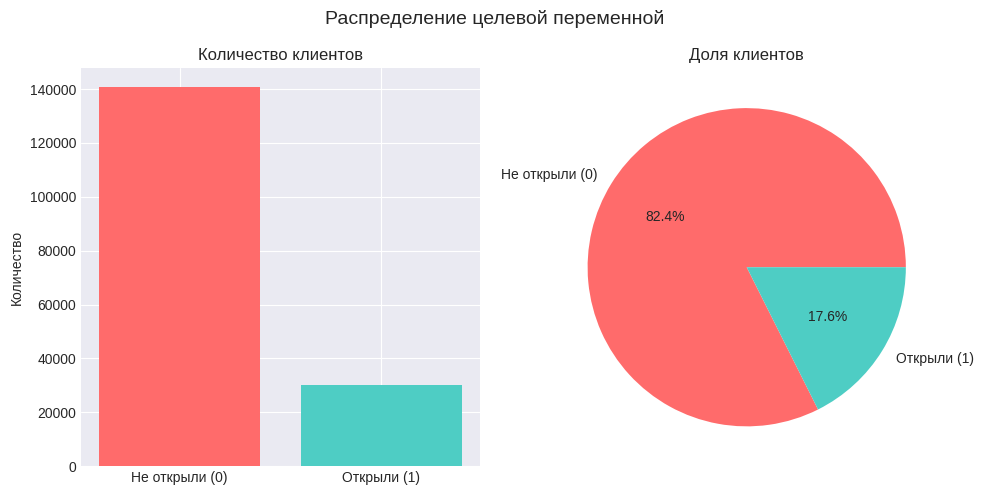


Вывод: Классы несбалансированы - только 17.6% клиентов открывают карту

2. РАСПРЕДЕЛЕНИЕ ЧИСЛОВЫХ ПРИЗНАКОВ


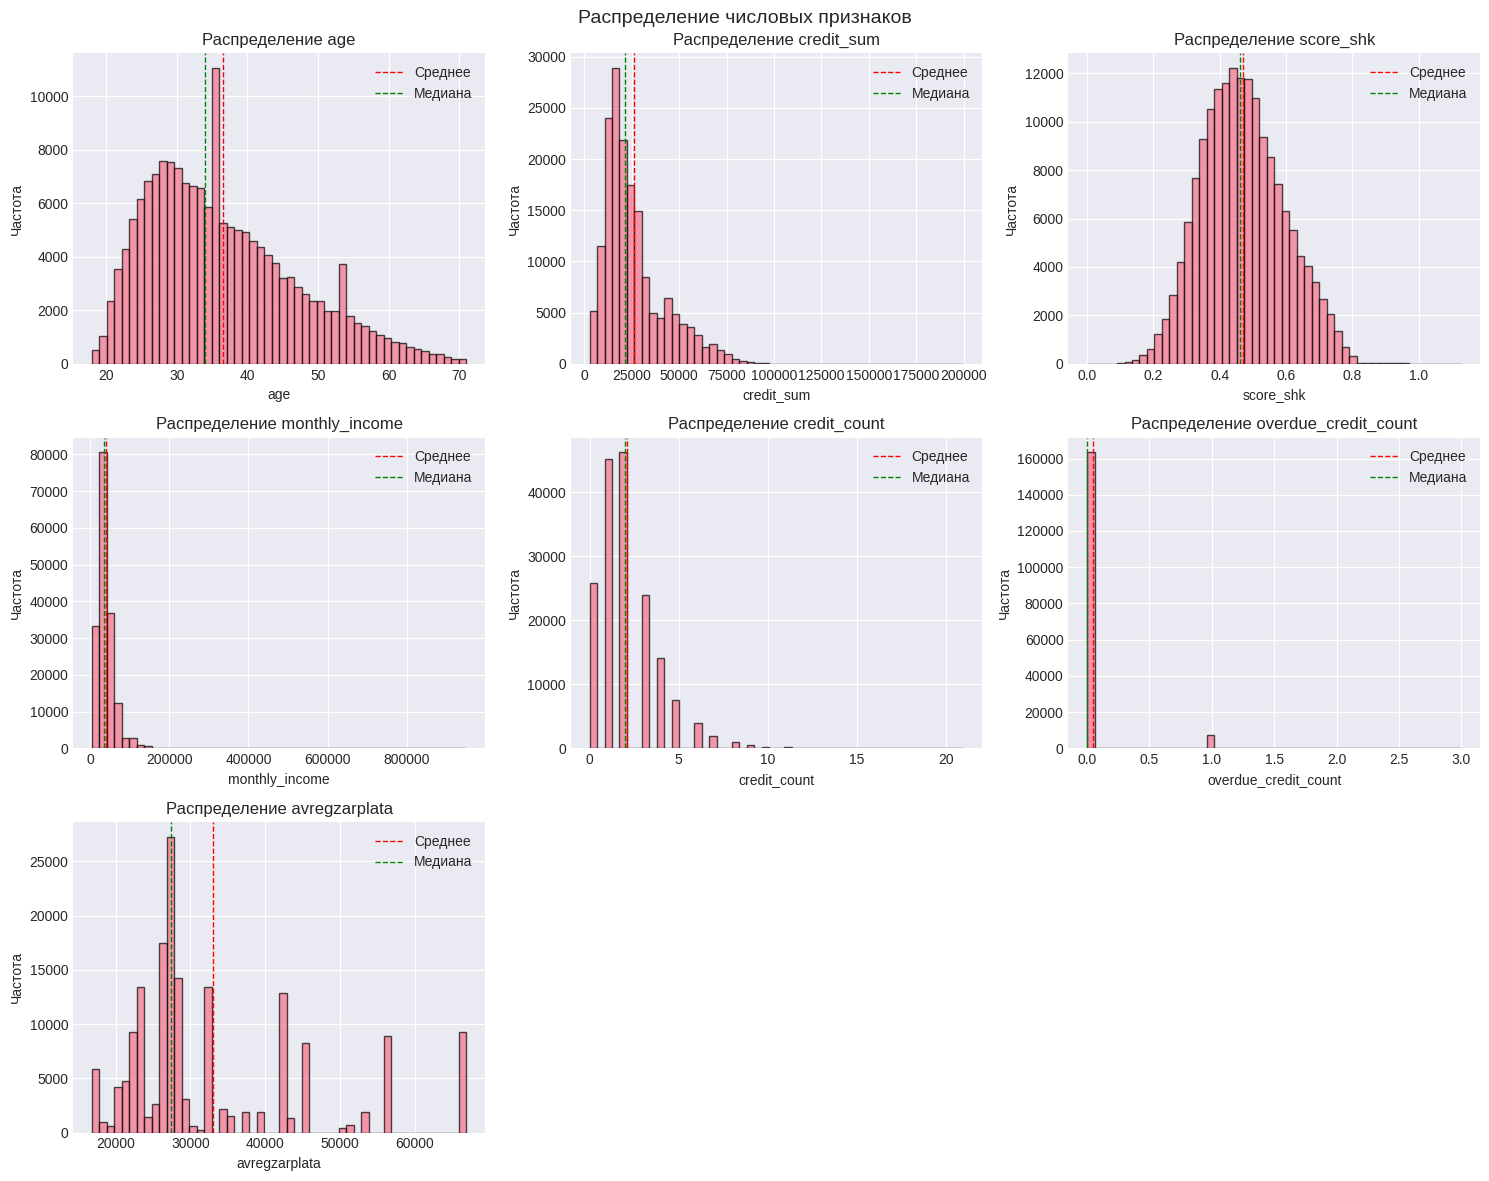


3. ВЫЯВЛЕНИЕ ВЫБРОСОВ (Boxplot):


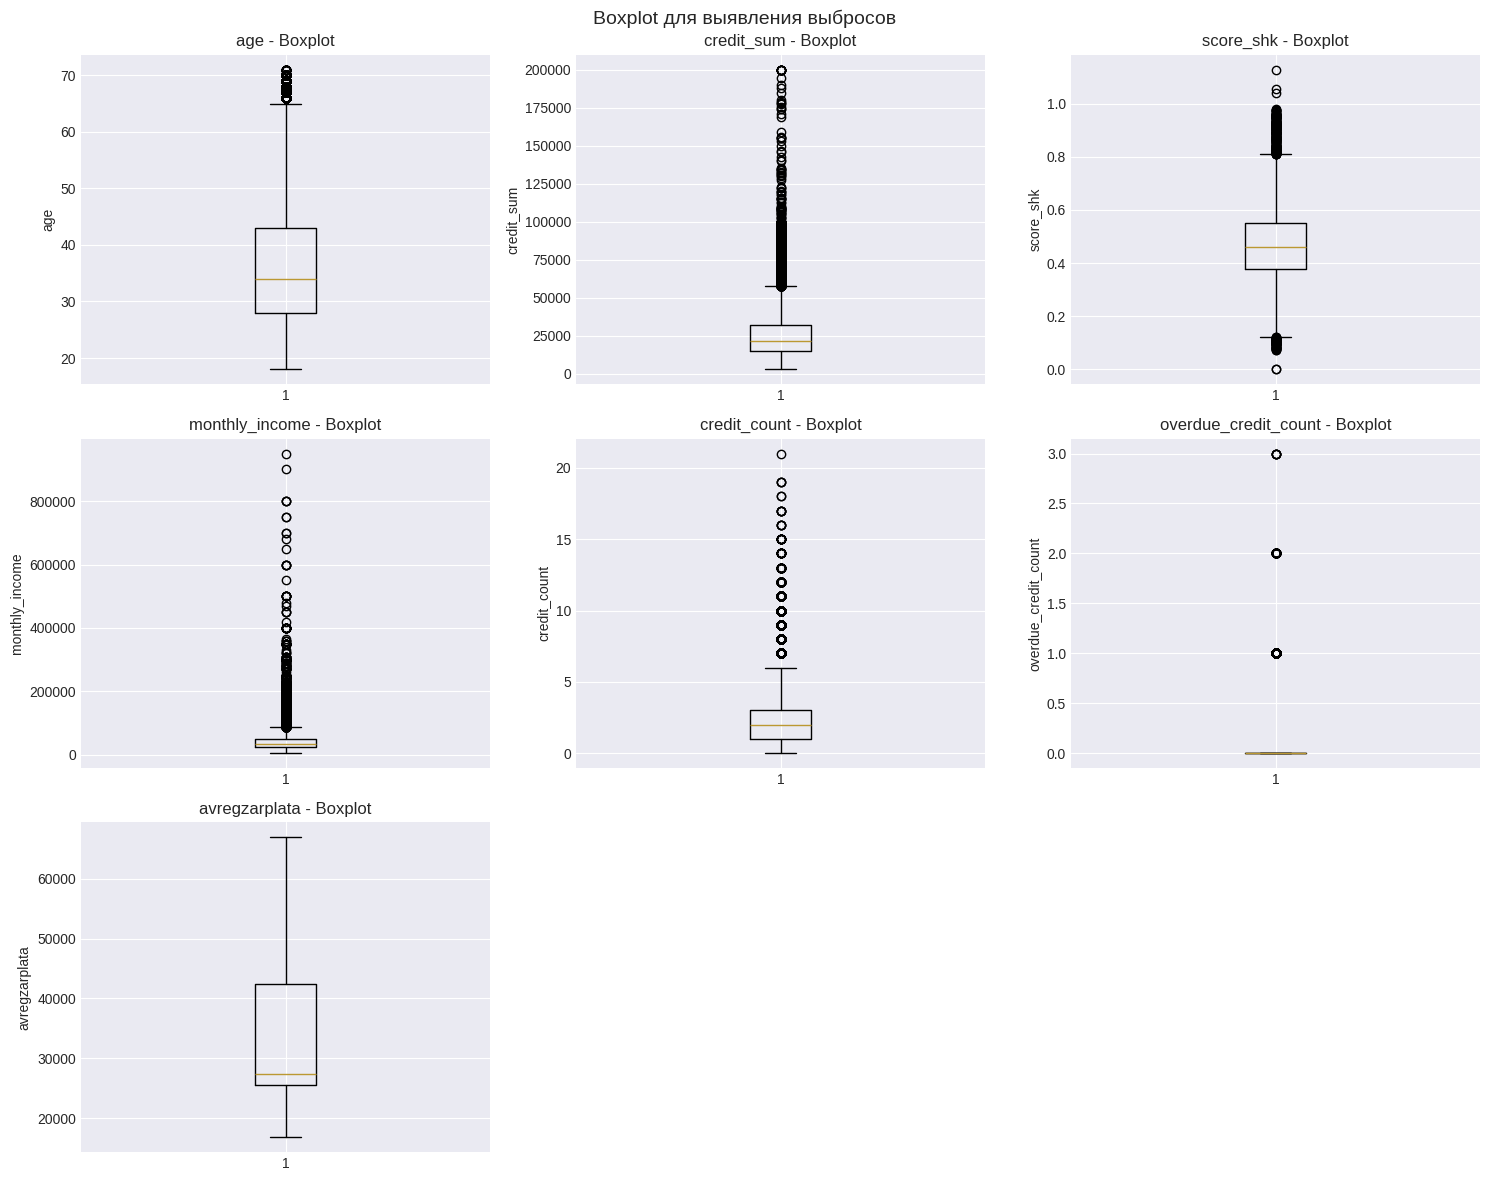


4. КОЛИЧЕСТВО ВЫБРОСОВ (по правилу 1.5*IQR):
   • age: 1322 выбросов (0.8%)
   • credit_sum: 10103 выбросов (5.9%)
   • score_shk: 243 выбросов (0.1%)
   • monthly_income: 6806 выбросов (4.0%)
   • credit_count: 3944 выбросов (2.3%)
   • overdue_credit_count: 7381 выбросов (4.3%)
   • avregzarplata: 0 выбросов (0.0%)

5. РАСПРЕДЕЛЕНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ


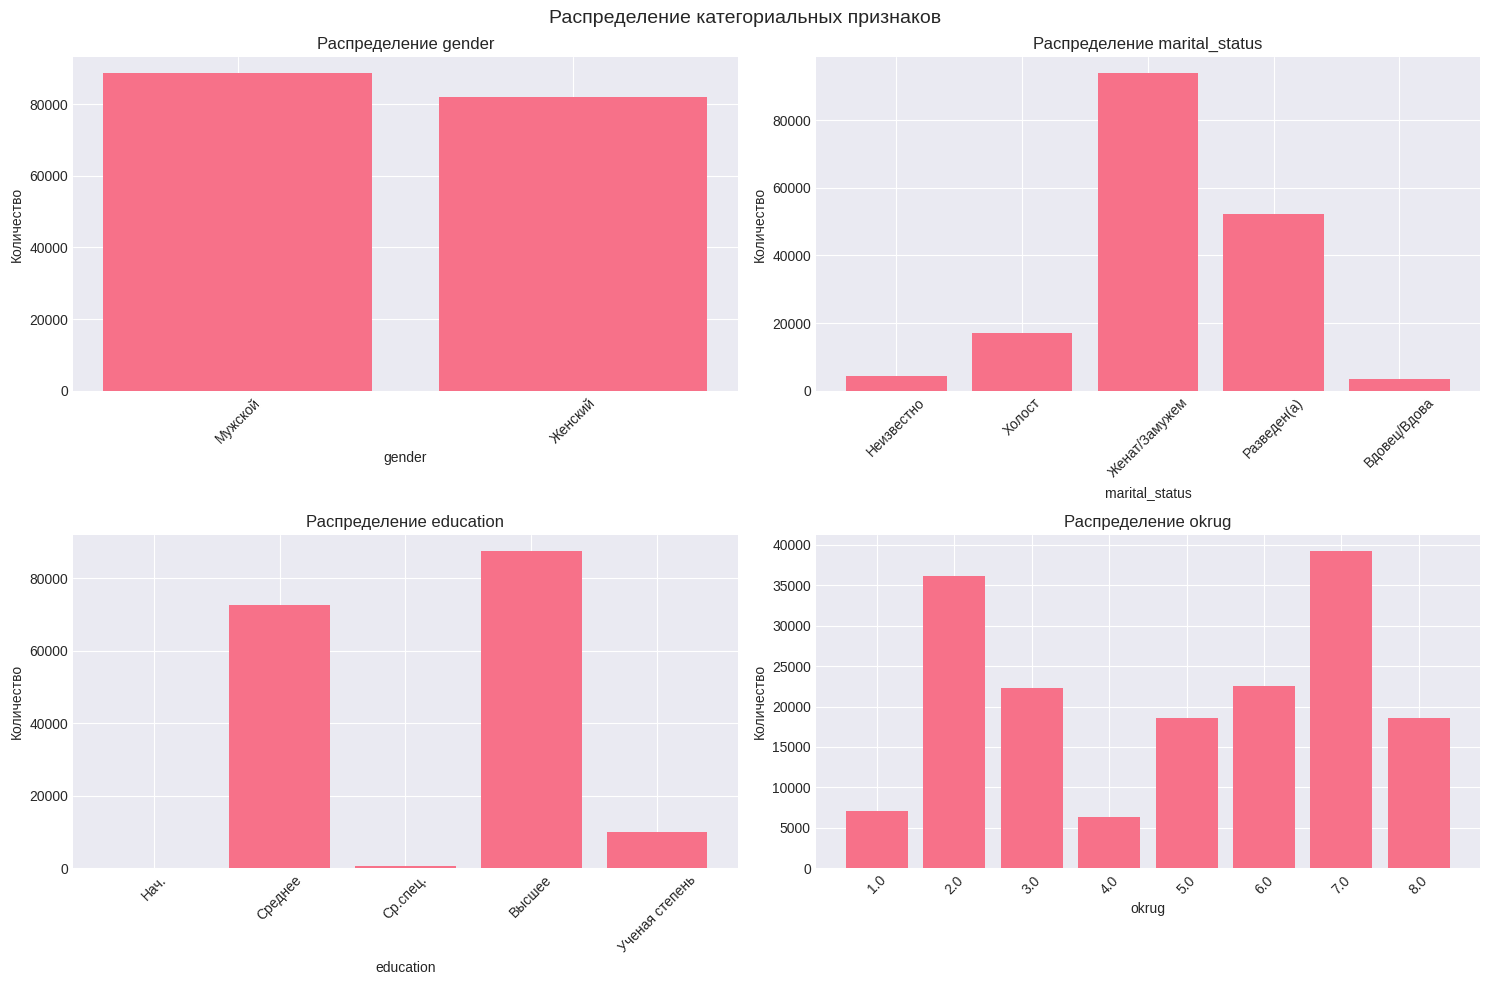


6. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ


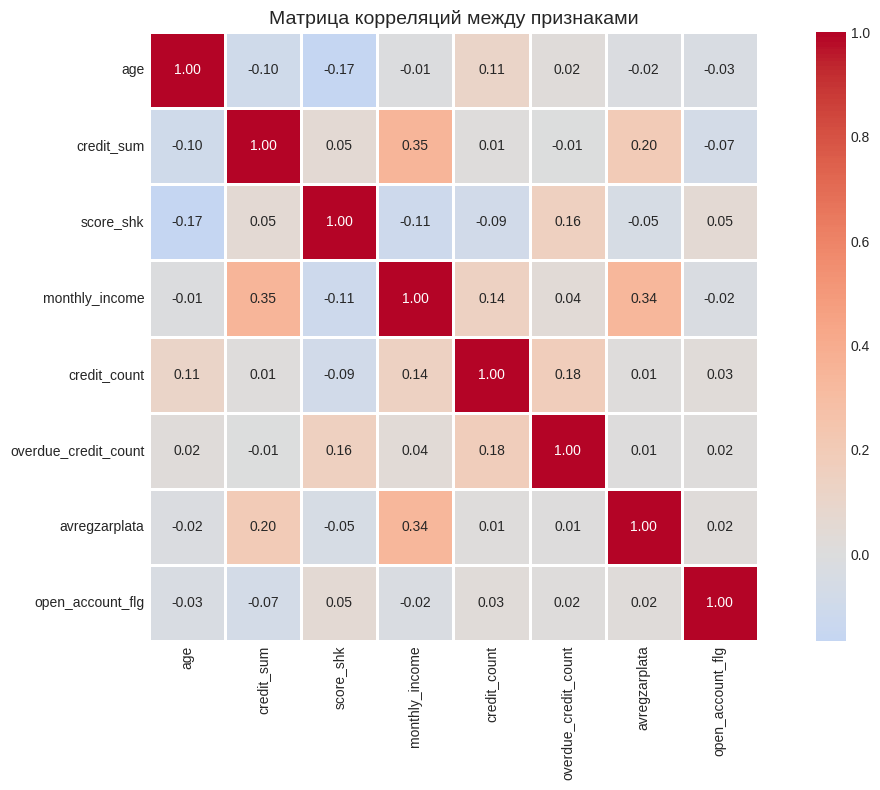


Корреляция признаков с целевой переменной (open_account_flg):
   • score_shk: 0.049
   • credit_count: 0.032
   • avregzarplata: 0.018
   • overdue_credit_count: 0.016
   • monthly_income: -0.024
   • age: -0.031
   • credit_sum: -0.072

7. АНАЛИЗ ВРЕМЕННЫХ ДАННЫХ


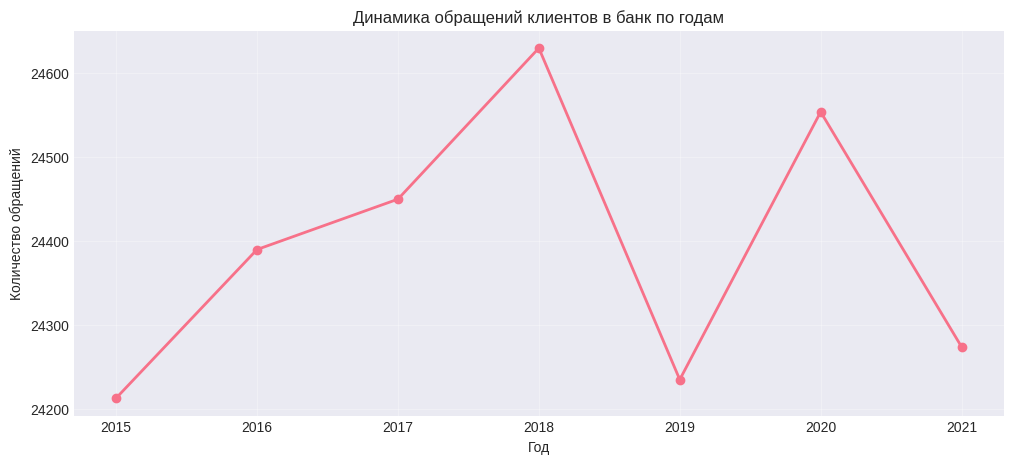

Период данных: 2015-01-01 10:36:12 - 2021-12-31 18:45:26
Всего лет: 7
Наиболее активный год: 2018 (24630 обращений)

ПРЕДВАРИТЕЛЬНЫЕ ВЫВОДЫ ПО ИССЛЕДОВАТЕЛЬСКОМУ АНАЛИЗУ
1. Целевая переменная:
   • Несбалансированные классы: 82.4% vs 17.6%

2. Числовые признаки:
   • Возраст: 36.5 ± 10.5 лет
   • Доход: 40138 ± 25044 руб.
   • Сумма кредита: 26095 ± 16235 руб.

3. Категориальные признаки:
   • Пол: 51.9% мужчин
   • Образование: 4.0 (мода)
   • Семейное положение: 3.0 (мода)

4. Корреляции:
   • Наибольшая корреляция с целью: score_shk (0.049)
   • Наименьшая корреляция с целью: credit_sum (-0.072)


In [22]:
print("="*60)
print("ШАГ 3: ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ")
print("="*60)

# 3.1. Распределение целевой переменной
print("\n1. РАСПРЕДЕЛЕНИЕ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (open_account_flg):")
target_counts = df['open_account_flg'].value_counts()
target_percent = df['open_account_flg'].value_counts(normalize=True) * 100

target_dist = pd.DataFrame({
    'Количество': target_counts,
    'Процент': target_percent.round(2)
})
print(target_dist)

# Визуализация
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(['Не открыли (0)', 'Открыли (1)'], target_counts.values, color=['#ff6b6b', '#4ecdc4'])
plt.title('Количество клиентов')
plt.ylabel('Количество')

plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=['Не открыли (0)', 'Открыли (1)'],
        autopct='%1.1f%%', colors=['#ff6b6b', '#4ecdc4'])
plt.title('Доля клиентов')

plt.suptitle('Распределение целевой переменной', fontsize=14)
plt.tight_layout()
plt.show()

print(f"\nВывод: Классы несбалансированы - только {target_percent[1]:.1f}% клиентов открывают карту")

# 3.2. Распределение числовых признаков
print("\n" + "="*60)
print("2. РАСПРЕДЕЛЕНИЕ ЧИСЛОВЫХ ПРИЗНАКОВ")
print("="*60)

# Выберем ключевые числовые признаки
numeric_features = ['age', 'credit_sum', 'score_shk', 'monthly_income',
                    'credit_count', 'overdue_credit_count', 'avregzarplata']

# Гистограммы распределений
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(numeric_features[:9]):
    if col in df.columns:
        axes[idx].hist(df[col], bins=50, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Распределение {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Частота')

        # Добавим вертикальные линии для среднего и медианы
        axes[idx].axvline(df[col].mean(), color='red', linestyle='--', linewidth=1, label='Среднее')
        axes[idx].axvline(df[col].median(), color='green', linestyle='--', linewidth=1, label='Медиана')
        axes[idx].legend()

# Уберем лишние оси если признаков меньше 9
for idx in range(len(numeric_features), 9):
    axes[idx].set_visible(False)

plt.suptitle('Распределение числовых признаков', fontsize=14)
plt.tight_layout()
plt.show()

# 3.3. Boxplot для выявления выбросов
print("\n3. ВЫЯВЛЕНИЕ ВЫБРОСОВ (Boxplot):")
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(numeric_features[:9]):
    if col in df.columns:
        axes[idx].boxplot(df[col].dropna())
        axes[idx].set_title(f'{col} - Boxplot')
        axes[idx].set_ylabel(col)

for idx in range(len(numeric_features), 9):
    axes[idx].set_visible(False)

plt.suptitle('Boxplot для выявления выбросов', fontsize=14)
plt.tight_layout()
plt.show()

# 3.4. Анализ выбросов
print("\n4. КОЛИЧЕСТВО ВЫБРОСОВ (по правилу 1.5*IQR):")
for col in numeric_features:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        outliers_percent = (outliers / len(df)) * 100

        print(f"   • {col}: {outliers} выбросов ({outliers_percent:.1f}%)")

# 3.5. Распределение категориальных признаков
print("\n" + "="*60)
print("5. РАСПРЕДЕЛЕНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ")
print("="*60)

categorical_features = ['gender', 'marital_status', 'education', 'okrug']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(categorical_features):
    if col in df.columns:
        value_counts = df[col].value_counts().sort_index()

        # Для лучшей читаемости преобразуем коды в названия где возможно
        if col == 'gender':
            labels = ['Мужской' if x == 1 else 'Женский' if x == 2 else str(x) for x in value_counts.index]
        elif col == 'marital_status':
            labels = ['Неизвестно', 'Холост', 'Женат/Замужем', 'Разведен(а)', 'Вдовец/Вдова']
            labels = [labels[int(x)-1] if 1 <= x <= 5 else str(x) for x in value_counts.index]
        elif col == 'education':
            labels = ['Нач.', 'Среднее', 'Ср.спец.', 'Высшее', 'Ученая степень']
            labels = [labels[int(x)-1] if 1 <= x <= 5 else str(x) for x in value_counts.index]
        else:
            labels = [str(x) for x in value_counts.index]

        axes[idx].bar(labels, value_counts.values)
        axes[idx].set_title(f'Распределение {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Количество')
        axes[idx].tick_params(axis='x', rotation=45)

plt.suptitle('Распределение категориальных признаков', fontsize=14)
plt.tight_layout()
plt.show()

# 3.6. Корреляционный анализ
print("\n" + "="*60)
print("6. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ")
print("="*60)

# Создаем матрицу корреляций
corr_matrix = df[numeric_features + ['open_account_flg']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=1)
plt.title('Матрица корреляций между признаками', fontsize=14)
plt.tight_layout()
plt.show()

# Анализ корреляций с целевой переменной
print("\nКорреляция признаков с целевой переменной (open_account_flg):")
corr_with_target = corr_matrix['open_account_flg'].sort_values(ascending=False)
for feature, corr_value in corr_with_target.items():
    if feature != 'open_account_flg':
        print(f"   • {feature}: {corr_value:.3f}")

# 3.7. Анализ временных данных (date_bank)
print("\n" + "="*60)
print("7. АНАЛИЗ ВРЕМЕННЫХ ДАННЫХ")
print("="*60)

if 'date_bank' in df.columns:
    # Извлекаем год и месяц
    df['year'] = df['date_bank'].dt.year
    df['month'] = df['date_bank'].dt.month
    df['year_month'] = df['date_bank'].dt.to_period('M')

    # Динамика обращений
    timeline = df.groupby('year').size()

    plt.figure(figsize=(12, 5))
    plt.plot(timeline.index, timeline.values, marker='o', linewidth=2)
    plt.title('Динамика обращений клиентов в банк по годам')
    plt.xlabel('Год')
    plt.ylabel('Количество обращений')
    plt.grid(True, alpha=0.3)
    plt.show()

    print(f"Период данных: {df['date_bank'].min()} - {df['date_bank'].max()}")
    print(f"Всего лет: {df['year'].nunique()}")
    print(f"Наиболее активный год: {timeline.idxmax()} ({timeline.max()} обращений)")

# 3.8. Предварительные выводы
print("\n" + "="*60)
print("ПРЕДВАРИТЕЛЬНЫЕ ВЫВОДЫ ПО ИССЛЕДОВАТЕЛЬСКОМУ АНАЛИЗУ")
print("="*60)

print("1. Целевая переменная:")
print(f"   • Несбалансированные классы: {target_percent[0]:.1f}% vs {target_percent[1]:.1f}%")

print("\n2. Числовые признаки:")
print(f"   • Возраст: {df['age'].mean():.1f} ± {df['age'].std():.1f} лет")
print(f"   • Доход: {df['monthly_income'].mean():.0f} ± {df['monthly_income'].std():.0f} руб.")
print(f"   • Сумма кредита: {df['credit_sum'].mean():.0f} ± {df['credit_sum'].std():.0f} руб.")

print("\n3. Категориальные признаки:")
print(f"   • Пол: {df['gender'].value_counts(normalize=True).iloc[0]*100:.1f}% мужчин")
print(f"   • Образование: {df['education'].mode()[0]} (мода)")
print(f"   • Семейное положение: {df['marital_status'].mode()[0]} (мода)")

print("\n4. Корреляции:")
print(f"   • Наибольшая корреляция с целью: {corr_with_target.index[1]} ({corr_with_target.iloc[1]:.3f})")
print(f"   • Наименьшая корреляция с целью: {corr_with_target.index[-1]} ({corr_with_target.iloc[-1]:.3f})")

ШАГ 4: ОТБОР ПРИЗНАКОВ И ПОРТРЕТЫ КЛИЕНТОВ
Размер групп:
• Группа 0 (не открыли): 140690 клиентов (82.4%)
• Группа 1 (открыли): 30056 клиентов (17.6%)

СРАВНЕНИЕ ГРУПП ПО ЧИСЛОВЫМ ПРИЗНАКАМ


,Признак,Группа 0 (среднее),Группа 1 (среднее),Разница,Разница %,Группа 0 (стд),Группа 1 (стд)
0,age,36.65,35.79,-0.86,-2.35,10.34,11.43
1,credit_sum,26635.64,23564.71,-3070.93,-11.53,16459.35,14880.81
2,score_shk,0.47,0.48,0.02,3.40,0.12,0.13
3,monthly_income,40412.59,38854.46,-1558.13,-3.86,25402.47,23250.87
4,credit_count,2.08,2.22,0.15,7.08,1.71,1.79
5,overdue_credit_count,0.04,0.05,0.01,20.46,0.20,0.22
6,avregzarplata,32849.39,33429.14,579.76,1.76,12432.40,13194.27



ВИЗУАЛИЗАЦИЯ КЛЮЧЕВЫХ РАЗЛИЧИЙ МЕЖДУ ГРУППАМИ


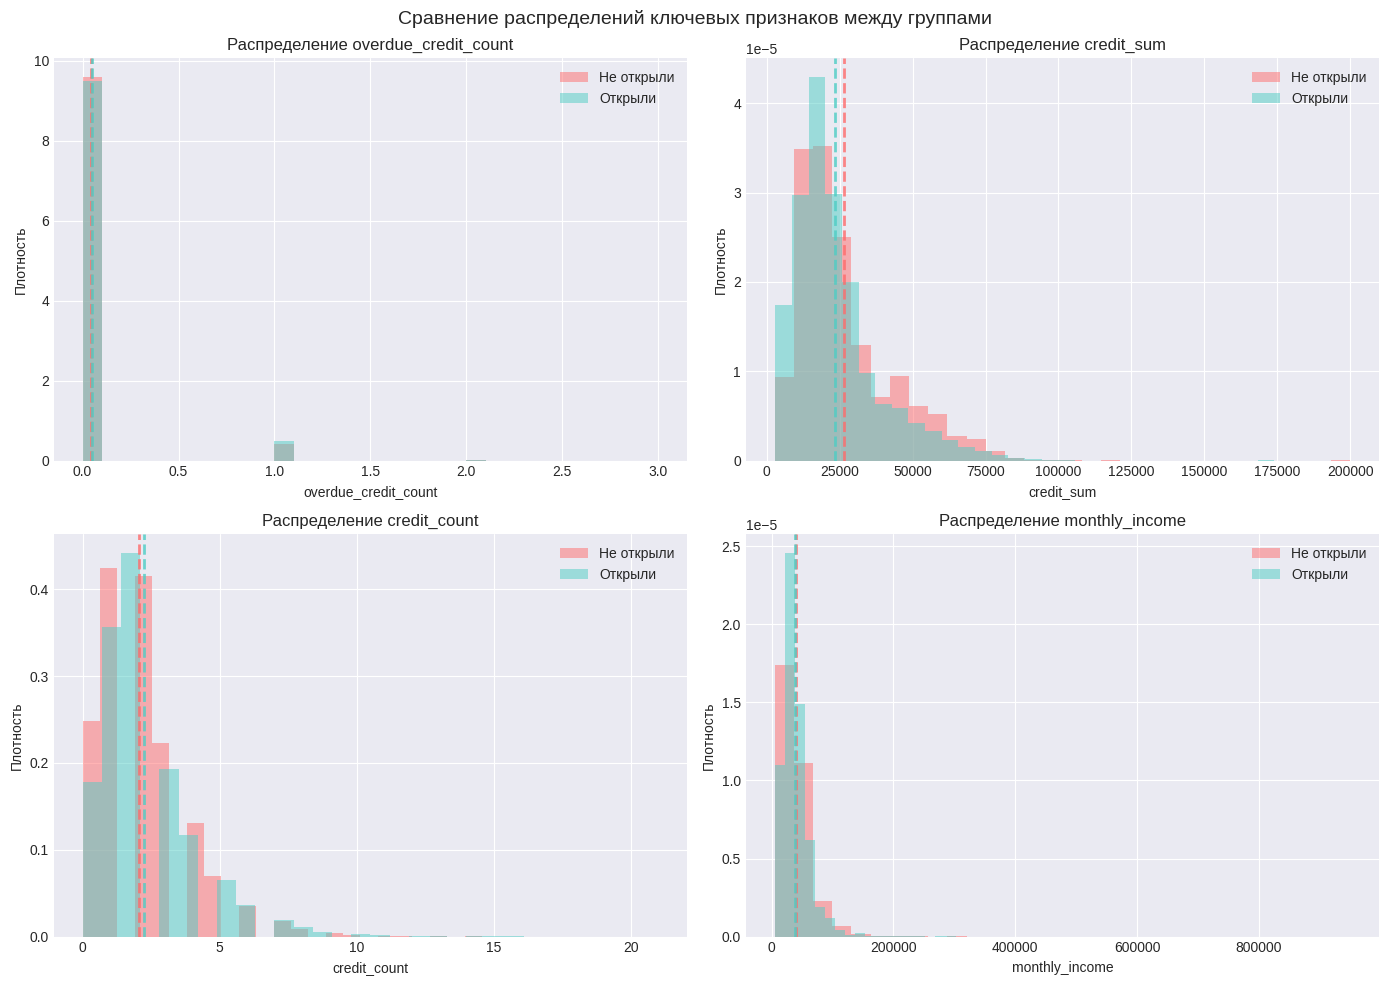


СРАВНЕНИЕ ГРУПП ПО КАТЕГОРИАЛЬНЫМ ПРИЗНАКАМ

GENDER:


,Категория,Группа 0 %,Группа 1 %,Разница (п.п.)
0,Мужской,52.97,47.16,-5.81
1,Женский,47.03,52.84,5.81


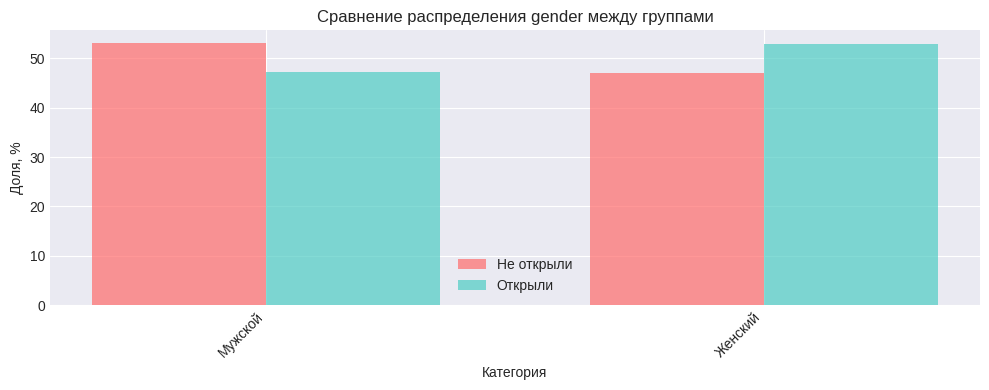


MARITAL_STATUS:


,Категория,Группа 0 %,Группа 1 %,Разница (п.п.)
0,Холост,2.38,2.81,0.43
1,Женат/Замужем,9.87,10.28,0.42
2,Разведен(а),56.57,47.80,-8.77
3,Вдовец/Вдова,29.24,36.65,7.42
4,Неизвестно,1.95,2.45,0.50


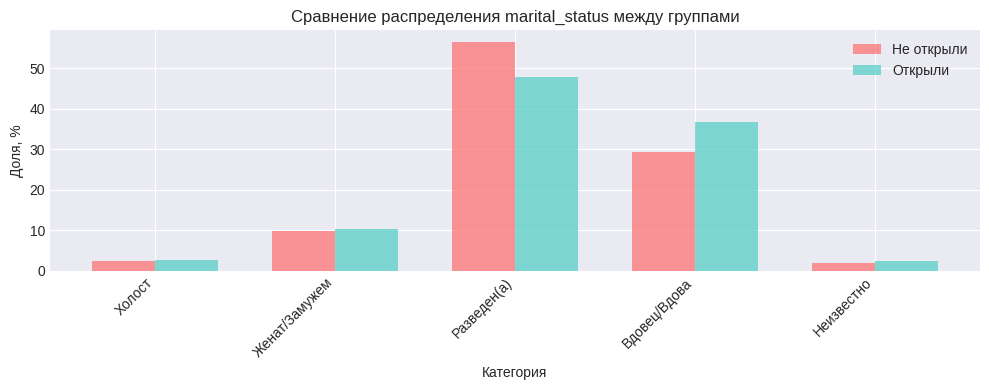


EDUCATION:


,Категория,Группа 0 %,Группа 1 %,Разница (п.п.)
0,Начальное,0.06,0.08,0.02
1,Среднее,44.40,33.70,-10.69
2,Среднее специальное,0.32,0.36,0.03
3,Высшее,49.46,59.74,10.28
4,Ученая степень,5.76,6.11,0.35


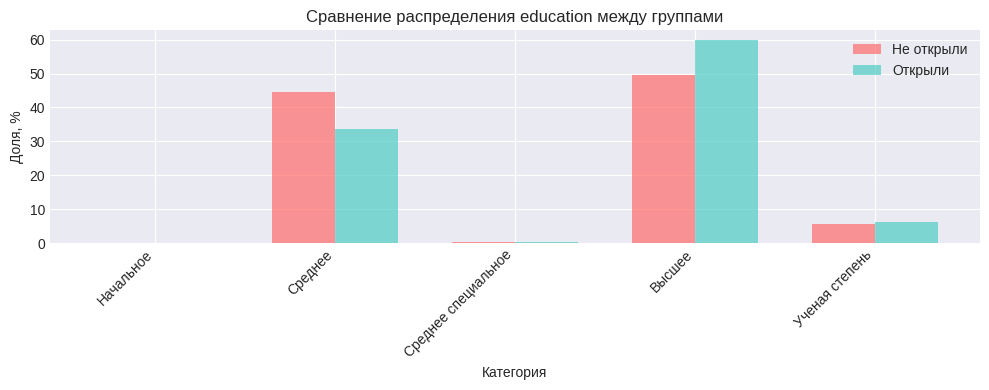


OKRUG:


,Категория,Группа 0 %,Группа 1 %,Разница (п.п.)
0,Округ 1,3.97,4.93,0.96
1,Округ 2,21.68,18.59,-3.10
2,Округ 3,13.48,11.09,-2.39
3,Округ 4,3.81,3.21,-0.61
4,Округ 5,10.44,13.04,2.61
5,Округ 6,13.11,13.64,0.53
6,Округ 7,22.78,23.94,1.16
7,Округ 8,10.72,11.56,0.84


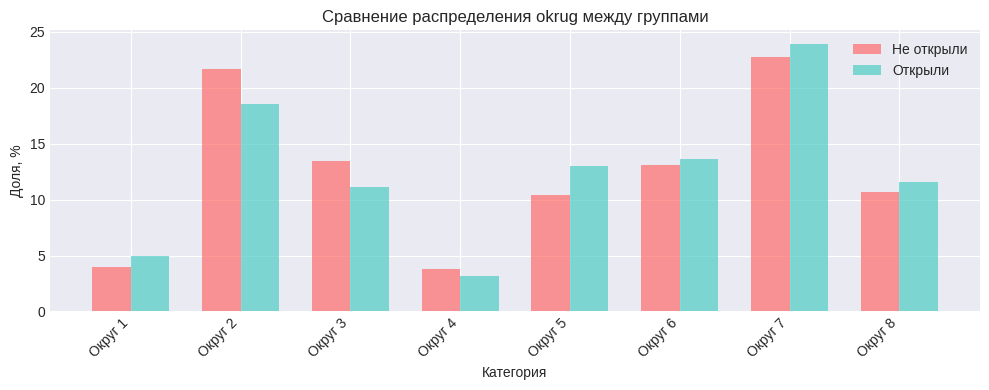


СТАТИСТИЧЕСКАЯ ПРОВЕРКА ЗНАЧИМОСТИ РАЗЛИЧИЙ (t-тест)


,Признак,p-value,Значимость,Размер эффекта (Cohen's d),Среднее_0,Среднее_1,Относительная разница %
0,age,0.00,ДА,0.08,36.65,35.79,-2.35
1,credit_sum,0.00,ДА,0.20,26635.64,23564.71,-11.53
2,score_shk,0.00,ДА,0.13,0.47,0.48,3.40
3,monthly_income,0.00,ДА,0.06,40412.59,38854.46,-3.86
4,credit_count,0.00,ДА,0.08,2.08,2.22,7.08
5,overdue_credit_count,0.00,ДА,0.04,0.04,0.05,20.46
6,avregzarplata,0.00,ДА,0.04,32849.39,33429.14,1.76



Статистически значимые различия (p-value < 0.05):
• 7 из 7 признаков

АНАЛИЗ КОМБИНАЦИЙ ПРИЗНАКОВ
1. Анализ по возрастным группам:


,"Доля открывших карту, %",Количество
age_group,,
18-25,25.47,23251
26-35,16.38,67861
36-45,15.36,45780
46-55,15.81,22956
55+,21.34,10792



2. Анализ по уровню дохода:


,"Доля открывших карту, %",Количество
income_group,,
Низкий,18.64,49414
Ниже среднего,17.95,43789
Выше среднего,17.07,44676
Высокий,16.30,32867



ФОРМИРОВАНИЕ ПОРТРЕТОВ КЛИЕНТОВ
ПОРТРЕТ КЛИЕНТА, КОТОРЫЙ ОТКРЫВАЕТ КАРТУ:
--------------------------------------------------
Демографические характеристики:
• Возраст: 35.8 лет (на -0.9 лет моложе)
• Пол: Женский (52.8%)
• Образование: 4.0 (59.7%)

Финансовые характеристики:
• Месячный доход: 38854 руб. (на -3.9% меньше)
• Сумма кредита: 23565 руб. (на -11.5% меньше)
• Скоринговый балл: 0.483 (на 0.016 выше)

Кредитная история:
• Количество кредитов: 2.2 (на 0.1 больше)
• Просроченные кредиты: 0.05 (на 0.01 больше)

ПОРТРЕТ КЛИЕНТА, КОТОРЫЙ НЕ ОТКРЫВАЕТ КАРТУ:
--------------------------------------------------
Демографические характеристики:
• Возраст: 36.6 лет
• Пол: Мужской (53.0%)
• Образование: 4.0 (49.5%)

Финансовые характеристики:
• Месячный доход: 40413 руб.
• Сумма кредита: 26636 руб.
• Скоринговый балл: 0.467

Кредитная история:
• Количество кредитов: 2.1
• Просроченные кредиты: 0.04

КЛЮЧЕВЫЕ ИНСАЙТЫ И РЕКОМЕНДАЦИИ
1. Самые значимые различия между группами:
   • credit_sum:

In [23]:
print("="*60)
print("ШАГ 4: ОТБОР ПРИЗНАКОВ И ПОРТРЕТЫ КЛИЕНТОВ")
print("="*60)

# 4.1. Создаем группы для анализа
group_0 = df[df['open_account_flg'] == 0]  # Не открыли карту
group_1 = df[df['open_account_flg'] == 1]  # Открыли карту

print(f"Размер групп:")
print(f"• Группа 0 (не открыли): {len(group_0)} клиентов ({len(group_0)/len(df)*100:.1f}%)")
print(f"• Группа 1 (открыли): {len(group_1)} клиентов ({len(group_1)/len(df)*100:.1f}%)")

# 4.2. Сравнение групп по числовым признакам
print("\n" + "="*60)
print("СРАВНЕНИЕ ГРУПП ПО ЧИСЛОВЫМ ПРИЗНАКАМ")
print("="*60)

numeric_comparison = []
key_numeric_features = ['age', 'credit_sum', 'score_shk', 'monthly_income',
                        'credit_count', 'overdue_credit_count', 'avregzarplata']

for col in key_numeric_features:
    mean_0 = group_0[col].mean()
    mean_1 = group_1[col].mean()
    std_0 = group_0[col].std()
    std_1 = group_1[col].std()
    diff = mean_1 - mean_0
    diff_percent = (diff / mean_0 * 100) if mean_0 != 0 else 0

    numeric_comparison.append({
        'Признак': col,
        'Группа 0 (среднее)': round(mean_0, 2),
        'Группа 1 (среднее)': round(mean_1, 2),
        'Разница': round(diff, 2),
        'Разница %': round(diff_percent, 2),
        'Группа 0 (стд)': round(std_0, 2),
        'Группа 1 (стд)': round(std_1, 2)
    })

comparison_df = pd.DataFrame(numeric_comparison)
display(comparison_df)

# 4.3. Визуализация ключевых различий
print("\n" + "="*60)
print("ВИЗУАЛИЗАЦИЯ КЛЮЧЕВЫХ РАЗЛИЧИЙ МЕЖДУ ГРУППАМИ")
print("="*60)

# Выбираем наиболее различимые признаки (по абсолютной разнице)
comparison_df['abs_diff'] = abs(comparison_df['Разница %'])
top_features = comparison_df.sort_values('abs_diff', ascending=False)['Признак'].head(4).tolist()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(top_features[:4]):
    # Гистограммы распределения
    axes[idx].hist(group_0[col], alpha=0.5, label='Не открыли', bins=30, density=True, color='#ff6b6b')
    axes[idx].hist(group_1[col], alpha=0.5, label='Открыли', bins=30, density=True, color='#4ecdc4')
    axes[idx].set_title(f'Распределение {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Плотность')
    axes[idx].legend()

    # Добавляем вертикальные линии для средних
    axes[idx].axvline(group_0[col].mean(), color='#ff6b6b', linestyle='--', linewidth=2, alpha=0.8)
    axes[idx].axvline(group_1[col].mean(), color='#4ecdc4', linestyle='--', linewidth=2, alpha=0.8)

plt.suptitle('Сравнение распределений ключевых признаков между группами', fontsize=14)
plt.tight_layout()
plt.show()

# 4.4. Сравнение по категориальным признакам
print("\n" + "="*60)
print("СРАВНЕНИЕ ГРУПП ПО КАТЕГОРИАЛЬНЫМ ПРИЗНАКАМ")
print("="*60)

categorical_features = ['gender', 'marital_status', 'education', 'okrug']

for col in categorical_features:
    print(f"\n{col.upper()}:")

    # Создаем датафрейм для сравнения
    dist_0 = group_0[col].value_counts(normalize=True).sort_index()
    dist_1 = group_1[col].value_counts(normalize=True).sort_index()

    # Создаем красивые названия для категорий
    if col == 'gender':
        index_names = ['Мужской', 'Женский']
    elif col == 'marital_status':
        index_names = ['Холост', 'Женат/Замужем', 'Разведен(а)', 'Вдовец/Вдова', 'Неизвестно']
    elif col == 'education':
        index_names = ['Начальное', 'Среднее', 'Среднее специальное', 'Высшее', 'Ученая степень']
    else:
        index_names = [f'Округ {int(x)}' if not pd.isna(x) else 'Неизвестно' for x in dist_0.index]

    comparison_cat = pd.DataFrame({
        'Категория': index_names,
        'Группа 0 %': (dist_0.values * 100).round(2),
        'Группа 1 %': (dist_1.values * 100).round(2),
        'Разница (п.п.)': ((dist_1.values - dist_0.values) * 100).round(2)
    })

    display(comparison_cat)

    # Визуализация
    plt.figure(figsize=(10, 4))

    x = np.arange(len(index_names))
    width = 0.35

    plt.bar(x - width/2, dist_0.values * 100, width, label='Не открыли', color='#ff6b6b', alpha=0.7)
    plt.bar(x + width/2, dist_1.values * 100, width, label='Открыли', color='#4ecdc4', alpha=0.7)

    plt.xlabel('Категория')
    plt.ylabel('Доля, %')
    plt.title(f'Сравнение распределения {col} между группами')
    plt.xticks(x, index_names, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

# 4.5. Статистическая проверка значимости различий
print("\n" + "="*60)
print("СТАТИСТИЧЕСКАЯ ПРОВЕРКА ЗНАЧИМОСТИ РАЗЛИЧИЙ (t-тест)")
print("="*60)

from scipy import stats

significant_features = []

for col in key_numeric_features:
    t_stat, p_value = stats.ttest_ind(group_0[col].dropna(),
                                     group_1[col].dropna(),
                                     equal_var=False)

    effect_size = abs(group_1[col].mean() - group_0[col].mean()) / np.sqrt(
        (group_0[col].std()**2 + group_1[col].std()**2) / 2
    )

    significant_features.append({
        'Признак': col,
        'p-value': round(p_value, 6),
        'Значимость': 'ДА' if p_value < 0.05 else 'НЕТ',
        'Размер эффекта (Cohen\'s d)': round(effect_size, 3),
        'Среднее_0': round(group_0[col].mean(), 2),
        'Среднее_1': round(group_1[col].mean(), 2),
        'Относительная разница %': round(((group_1[col].mean() - group_0[col].mean()) / group_0[col].mean() * 100), 2)
    })

significance_df = pd.DataFrame(significant_features).sort_values('p-value')
display(significance_df)

print(f"\nСтатистически значимые различия (p-value < 0.05):")
significant_count = significance_df[significance_df['Значимость'] == 'ДА'].shape[0]
print(f"• {significant_count} из {len(key_numeric_features)} признаков")

# 4.6. Анализ комбинаций признаков
print("\n" + "="*60)
print("АНАЛИЗ КОМБИНАЦИЙ ПРИЗНАКОВ")
print("="*60)

# Создаем несколько сегментов для анализа
print("1. Анализ по возрастным группам:")
df['age_group'] = pd.cut(df['age'],
                         bins=[18, 25, 35, 45, 55, 100],
                         labels=['18-25', '26-35', '36-45', '46-55', '55+'])

age_group_analysis = df.groupby('age_group')['open_account_flg'].agg(['mean', 'count'])
age_group_analysis['mean'] = (age_group_analysis['mean'] * 100).round(2)
age_group_analysis = age_group_analysis.rename(columns={'mean': 'Доля открывших карту, %', 'count': 'Количество'})
display(age_group_analysis)

print("\n2. Анализ по уровню дохода:")
df['income_group'] = pd.qcut(df['monthly_income'], q=4, labels=['Низкий', 'Ниже среднего', 'Выше среднего', 'Высокий'])
income_analysis = df.groupby('income_group')['open_account_flg'].agg(['mean', 'count'])
income_analysis['mean'] = (income_analysis['mean'] * 100).round(2)
income_analysis = income_analysis.rename(columns={'mean': 'Доля открывших карту, %', 'count': 'Количество'})
display(income_analysis)

# 4.7. Формирование портретов клиентов
print("\n" + "="*60)
print("ФОРМИРОВАНИЕ ПОРТРЕТОВ КЛИЕНТОВ")
print("="*60)

print("ПОРТРЕТ КЛИЕНТА, КОТОРЫЙ ОТКРЫВАЕТ КАРТУ:")
print("-" * 50)
print("Демографические характеристики:")
print(f"• Возраст: {group_1['age'].mean():.1f} лет (на {group_1['age'].mean() - group_0['age'].mean():.1f} лет моложе)")
print(f"• Пол: {('Мужской' if group_1['gender'].mode()[0] == 1 else 'Женский')} "
      f"({group_1['gender'].value_counts(normalize=True).iloc[0]*100:.1f}%)")
print(f"• Образование: {group_1['education'].mode()[0]} "
      f"({group_1[group_1['education'] == group_1['education'].mode()[0]].shape[0]/len(group_1)*100:.1f}%)")

print("\nФинансовые характеристики:")
print(f"• Месячный доход: {group_1['monthly_income'].mean():.0f} руб. "
      f"(на {(group_1['monthly_income'].mean() - group_0['monthly_income'].mean())/group_0['monthly_income'].mean()*100:.1f}% меньше)")
print(f"• Сумма кредита: {group_1['credit_sum'].mean():.0f} руб. "
      f"(на {(group_1['credit_sum'].mean() - group_0['credit_sum'].mean())/group_0['credit_sum'].mean()*100:.1f}% меньше)")
print(f"• Скоринговый балл: {group_1['score_shk'].mean():.3f} "
      f"(на {group_1['score_shk'].mean() - group_0['score_shk'].mean():.3f} выше)")

print("\nКредитная история:")
print(f"• Количество кредитов: {group_1['credit_count'].mean():.1f} "
      f"(на {group_1['credit_count'].mean() - group_0['credit_count'].mean():.1f} больше)")
print(f"• Просроченные кредиты: {group_1['overdue_credit_count'].mean():.2f} "
      f"(на {group_1['overdue_credit_count'].mean() - group_0['overdue_credit_count'].mean():.2f} больше)")

print("\n" + "="*60)
print("ПОРТРЕТ КЛИЕНТА, КОТОРЫЙ НЕ ОТКРЫВАЕТ КАРТУ:")
print("-" * 50)
print("Демографические характеристики:")
print(f"• Возраст: {group_0['age'].mean():.1f} лет")
print(f"• Пол: {('Мужской' if group_0['gender'].mode()[0] == 1 else 'Женский')} "
      f"({group_0['gender'].value_counts(normalize=True).iloc[0]*100:.1f}%)")
print(f"• Образование: {group_0['education'].mode()[0]} "
      f"({group_0[group_0['education'] == group_0['education'].mode()[0]].shape[0]/len(group_0)*100:.1f}%)")

print("\nФинансовые характеристики:")
print(f"• Месячный доход: {group_0['monthly_income'].mean():.0f} руб.")
print(f"• Сумма кредита: {group_0['credit_sum'].mean():.0f} руб.")
print(f"• Скоринговый балл: {group_0['score_shk'].mean():.3f}")

print("\nКредитная история:")
print(f"• Количество кредитов: {group_0['credit_count'].mean():.1f}")
print(f"• Просроченные кредиты: {group_0['overdue_credit_count'].mean():.2f}")

# 4.8. Ключевые инсайты
print("\n" + "="*60)
print("КЛЮЧЕВЫЕ ИНСАЙТЫ И РЕКОМЕНДАЦИИ")
print("="*60)

print("1. Самые значимые различия между группами:")
for idx, row in significance_df[significance_df['Значимость'] == 'ДА'].sort_values('Размер эффекта (Cohen\'s d)', ascending=False).head(3).iterrows():
    direction = "выше" if row['Среднее_1'] > row['Среднее_0'] else "ниже"
    print(f"   • {row['Признак']}: у открывающих карту {direction} на {abs(row['Относительная разница %']):.1f}%")

print("\n2. Возрастные особенности:")
young_ratio = age_group_analysis.loc['18-25', 'Доля открывших карту, %'] / age_group_analysis['Доля открывших карту, %'].mean()
print(f"   • Молодые клиенты (18-25 лет) открывают карту в {young_ratio:.1f} раза чаще среднего")

print("\n3. Финансовые особенности:")
print(f"   • Клиенты с меньшими суммами кредитов чаще открывают карту")
print(f"   • Клиенты с более высоким скоринговым баллом чаще открывают карту")

print("\n4. Рекомендации для маркетинга:")
print("   • Целевая аудитория: молодые клиенты (18-35 лет)")
print("   • Акцент на клиентах с хорошей кредитной историей (высокий score_shk)")
print("   • Предлагать карту при небольших кредитах")
print("   • Особое внимание клиентам, которые уже имеют несколько кредитов")

# 4.9. Сохранение результатов
print("\n" + "="*60)
print("СОХРАНЕНИЕ РЕЗУЛЬТАТОВ")
print("="*60)

# Сохраняем обработанные данные
df.to_csv('processed_clients_data.csv', index=False, encoding='utf-8')
print("✓ Обработанные данные сохранены в 'processed_clients_data.csv'")

# Сохраняем сравнение групп
comparison_df.to_csv('group_comparison.csv', index=False, encoding='utf-8')
print("✓ Сравнение групп сохранено в 'group_comparison.csv'")

# Сохраняем статистическую значимость
significance_df.to_csv('statistical_significance.csv', index=False, encoding='utf-8')
print("✓ Статистическая значимость сохранена в 'statistical_significance.csv'")

print("\n" + "="*60)
print("ШАГ 4 ЗАВЕРШЕН УСПЕШНО!")
print("="*60)